<a href="https://colab.research.google.com/github/shunkovy/skimage_DTS/blob/master/Simulate_TS_Data.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [0]:
import numpy as np
import matplotlib.pyplot as plt

from skimage.data import shepp_logan_phantom
from skimage.transform import radon, rescale
from skimage.transform import iradon
from skimage.transform import iradon_sart
from skimage import io

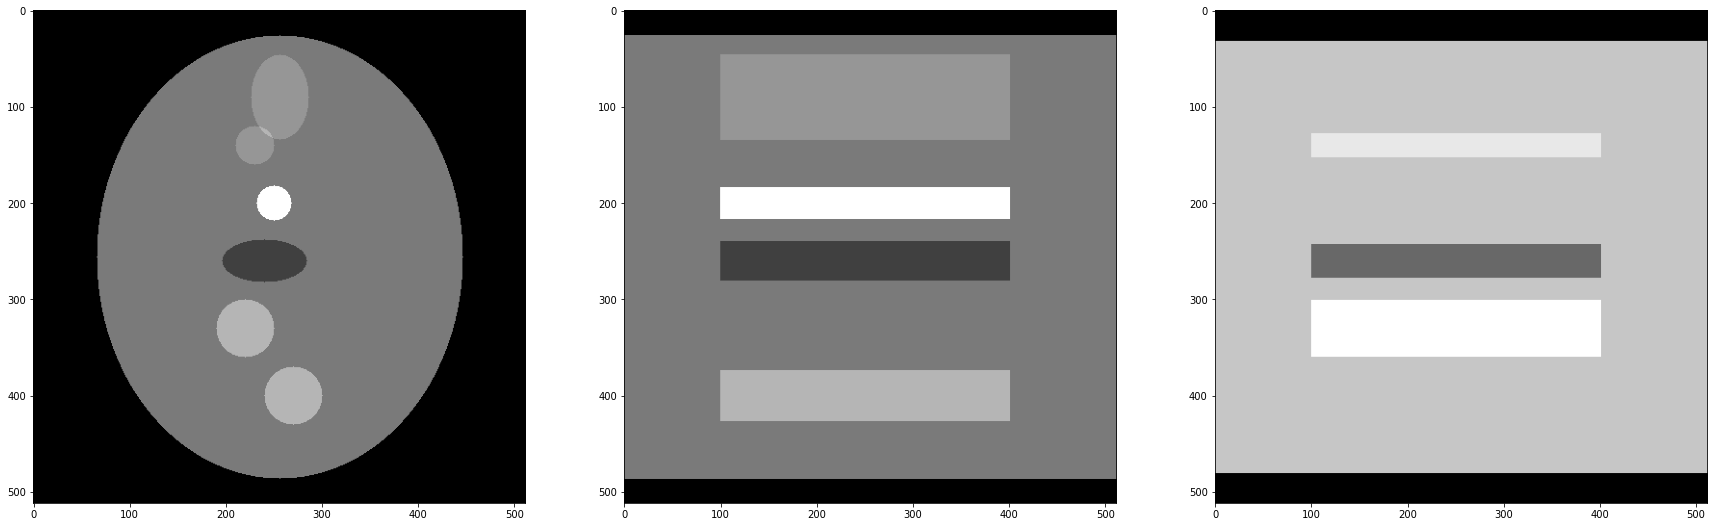

In [0]:
image_kraft = np.zeros((512, 512))
image_uniform_kraft = np.zeros_like(image_kraft)

for i in range(image_kraft.shape[0]):
  for j in range(image_kraft.shape[1]):
    if ((i-256)**2/230**2 + (j-256)**2/190**2) <= 1:
      image_kraft[i,j] += 0.4
      image_uniform_kraft[i,j] += 0.4
    if ((i-90)**2/44**2 + (j-256)**2/30**2) <= 1:
      image_kraft[i,j] += 0.1
    if ((i-140)**2/20**2 + (j-230)**2/20**2) <= 1:
      image_kraft[i,j] += 0.1
    if ((i-200)**2/18**2 + (j-250)**2/18**2) <= 1:
      image_kraft[i,j] += 0.6
    if ((i-260)**2/22**2 + (j-240)**2/44**2) <= 1:
      image_kraft[i,j] -= 0.2
    if ((i-330)**2/30**2 + (j-220)**2/30**2) <= 1:
      image_kraft[i,j] += 0.2
    if ((i-400)**2/30**2 + (j-270)**2/30**2) <= 1:
      image_kraft[i,j] += 0.2

layer_1_ind = 256
layer_2_ind = 214
layer_1 = np.zeros_like(image_kraft)
layer_2 = np.zeros_like(image_kraft)
for j in range(image_kraft.shape[1]):
  if (j<100) or (j>400):
    layer_1[:,j] += image_uniform_kraft[:,layer_1_ind]
    layer_2[:,j] += image_uniform_kraft[:,layer_2_ind]
  else:
    layer_1[:,j] += image_kraft[:,layer_1_ind]
    layer_2[:,j] += image_kraft[:,layer_2_ind]

fig, (ax1, ax2, ax3) = plt.subplots(1, 3, figsize=(30, 10))
ax1.imshow(image_kraft, cmap=plt.cm.Greys_r)
ax2.imshow(layer_1, cmap=plt.cm.Greys_r)
ax3.imshow(layer_2, cmap=plt.cm.Greys_r)

#io.imsave('phantom1.jpg', image_kraft)
#io.imsave('phantom2.jpg', layer_1)
#io.imsave('phantom3.jpg', layer_2)

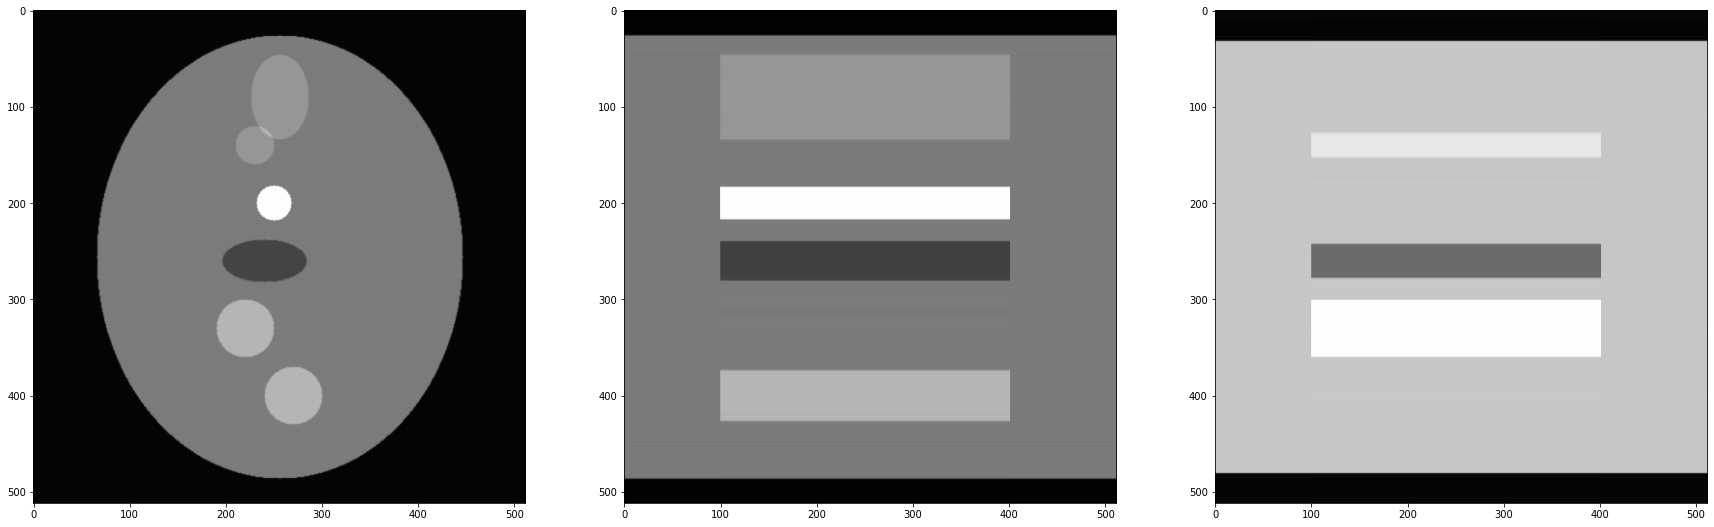

In [0]:
theta = np.linspace(0., 180., max(image_kraft.shape), endpoint=False)
sinogram = radon(image_kraft, theta=theta, circle=True)
sinogram_uniform = radon(image_uniform_kraft, theta=theta, circle=True)

reconstruction_fbp = iradon(sinogram[], theta=theta[], circle=True, filter = 'ramp')
reconstruction_fbp_uniform = iradon(sinogram_uniform[], theta=theta[], circle=True, filter = 'ramp')

layer_1_ind = 256
layer_2_ind = 214
layer_1_fbp = np.zeros_like(reconstruction_fbp)
layer_2_fbp = np.zeros_like(reconstruction_fbp)
for j in range(reconstruction_fbp.shape[1]):
  if (j<100) or (j>400):
    layer_1_fbp[:,j] += reconstruction_fbp_uniform[:,layer_1_ind]
    layer_2_fbp[:,j] += reconstruction_fbp_uniform[:,layer_2_ind]
  else:
    layer_1_fbp[:,j] += reconstruction_fbp[:,layer_1_ind]
    layer_2_fbp[:,j] += reconstruction_fbp[:,layer_2_ind]

fig, (ax1, ax2, ax3) = plt.subplots(1, 3, figsize=(30, 10))
ax1.imshow(reconstruction_fbp, cmap=plt.cm.Greys_r)
ax2.imshow(layer_1_fbp, cmap=plt.cm.Greys_r)
ax3.imshow(layer_2_fbp, cmap=plt.cm.Greys_r)

io.imsave('phantom_180rec_1.jpg', reconstruction_fbp)
io.imsave('phantom_180rec_2.jpg', layer_1_fbp)
io.imsave('phantom_180rec_3.jpg', layer_2_fbp)

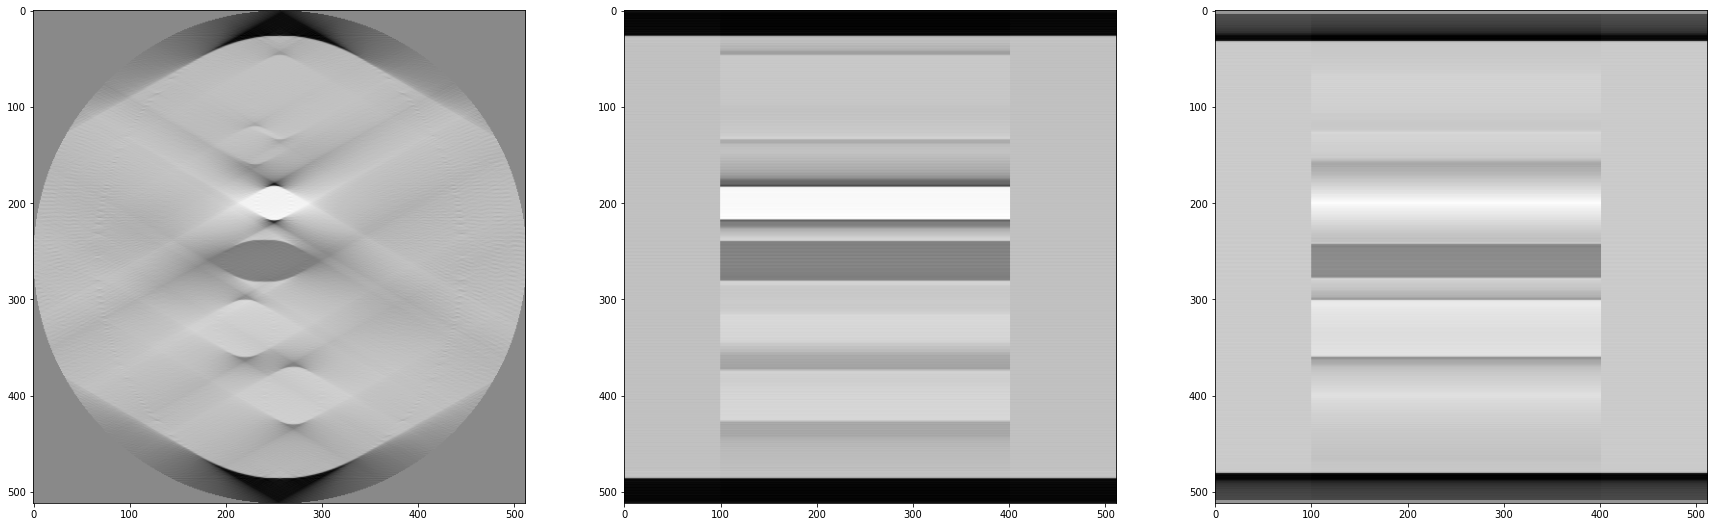

In [0]:
angle = 60.
proj_numb = 60
filter_type = 'ramp'

theta = np.linspace((90.-angle/2), (90.+angle/2), proj_numb, endpoint=False)
sinogram = radon(image_kraft, theta=theta, circle=True)
sinogram_uniform = radon(image_uniform_kraft, theta=theta, circle=True)

reconstruction_fbp = iradon(sinogram, theta=theta, circle=True, filter = filter_type)
reconstruction_fbp_uniform = iradon(sinogram_uniform, theta=theta, circle=True, filter = filter_type)

layer_ind = 256
layer_1_fbp = np.zeros_like(reconstruction_fbp)
for j in range(reconstruction_fbp.shape[1]):
  if (j<100) or (j>400):
    layer_1_fbp[:,j] += reconstruction_fbp_uniform[:,layer_ind]
  else:
    layer_1_fbp[:,j] += reconstruction_fbp[:,layer_ind]

layer_ind = 214
layer_2_fbp = np.zeros_like(reconstruction_fbp)
for j in range(reconstruction_fbp.shape[1]):
  if (j<100) or (j>400):
    layer_2_fbp[:,j] += reconstruction_fbp_uniform[:,layer_ind]
  else:
    layer_2_fbp[:,j] += reconstruction_fbp[:,layer_ind]

fig, (ax1, ax2, ax3) = plt.subplots(1, 3, figsize=(30, 10))
ax1.imshow(reconstruction_fbp, cmap=plt.cm.Greys_r)
ax2.imshow(layer_1_fbp, cmap=plt.cm.Greys_r)
ax3.imshow(layer_2_fbp, cmap=plt.cm.Greys_r)

#io.imsave('phantom_ang'+str(angle)+'_proj'+str(proj_numb)+'_filter_'+filter_type+'_rec_1.jpg', reconstruction_fbp)
#io.imsave('phantom_ang'+str(angle)+'_proj'+str(proj_numb)+'_filter_'+filter_type+'_rec_2.jpg', layer_1_fbp)
#io.imsave('phantom_ang'+str(angle)+'_proj'+str(proj_numb)+'_filter_'+filter_type+'_rec_3.jpg', layer_2_fbp)

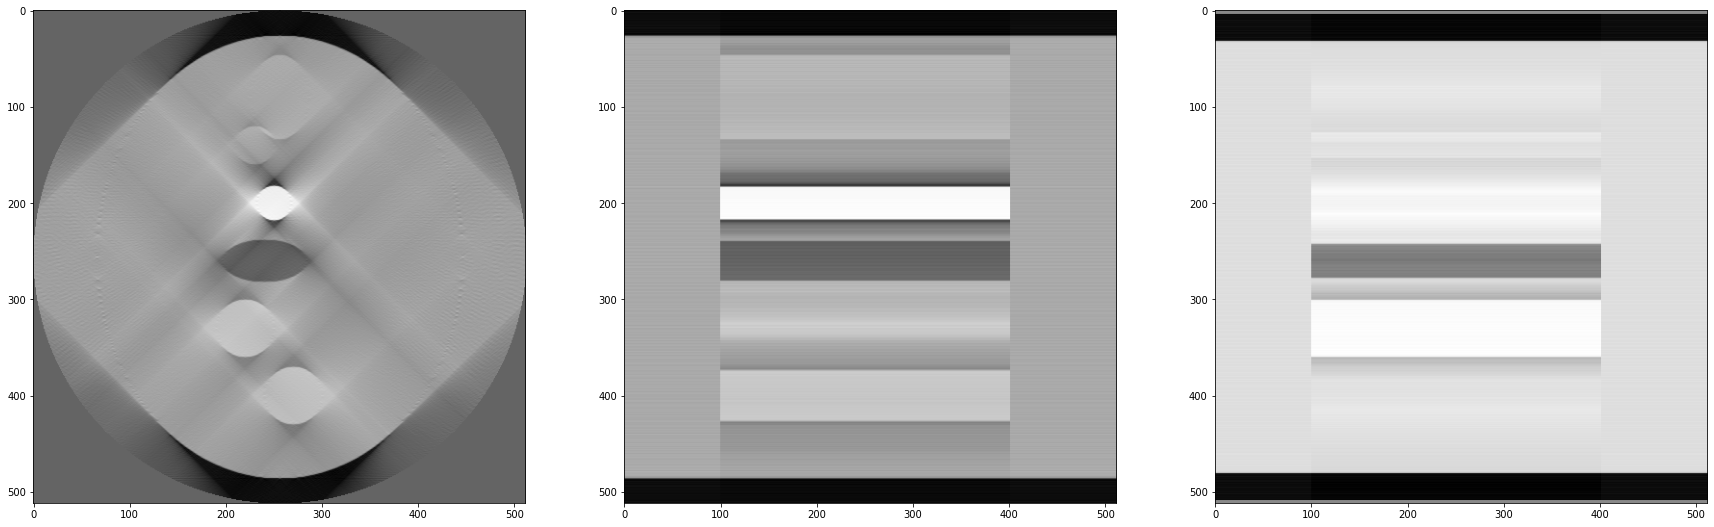

In [0]:
angle = 90.
proj_numb = 90
filter_type = 'ramp'

theta = np.linspace((90.-angle/2), (90.+angle/2), proj_numb, endpoint=False)
sinogram = radon(image_kraft, theta=theta, circle=True)
sinogram_uniform = radon(image_uniform_kraft, theta=theta, circle=True)

reconstruction_fbp = iradon(sinogram, theta=theta, circle=True, filter = filter_type)
reconstruction_fbp_uniform = iradon(sinogram_uniform, theta=theta, circle=True, filter = filter_type)

layer_ind = 256
layer_1_fbp = np.zeros_like(reconstruction_fbp)
for j in range(reconstruction_fbp.shape[1]):
  if (j<100) or (j>400):
    layer_1_fbp[:,j] += reconstruction_fbp_uniform[:,layer_ind]
  else:
    layer_1_fbp[:,j] += reconstruction_fbp[:,layer_ind]

layer_ind = 214
layer_2_fbp = np.zeros_like(reconstruction_fbp)
for j in range(reconstruction_fbp.shape[1]):
  if (j<100) or (j>400):
    layer_2_fbp[:,j] += reconstruction_fbp_uniform[:,layer_ind]
  else:
    layer_2_fbp[:,j] += reconstruction_fbp[:,layer_ind]

fig, (ax1, ax2, ax3) = plt.subplots(1, 3, figsize=(30, 10))
ax1.imshow(reconstruction_fbp, cmap=plt.cm.Greys_r)
ax2.imshow(layer_1_fbp, cmap=plt.cm.Greys_r)
ax3.imshow(layer_2_fbp, cmap=plt.cm.Greys_r)

#io.imsave('phantom_ang'+str(angle)+'_proj'+str(proj_numb)+'_filter_'+filter_type+'_rec_1.jpg', reconstruction_fbp)
#io.imsave('phantom_ang'+str(angle)+'_proj'+str(proj_numb)+'_filter_'+filter_type+'_rec_2.jpg', layer_1_fbp)
#io.imsave('phantom_ang'+str(angle)+'_proj'+str(proj_numb)+'_filter_'+filter_type+'_rec_3.jpg', layer_2_fbp)

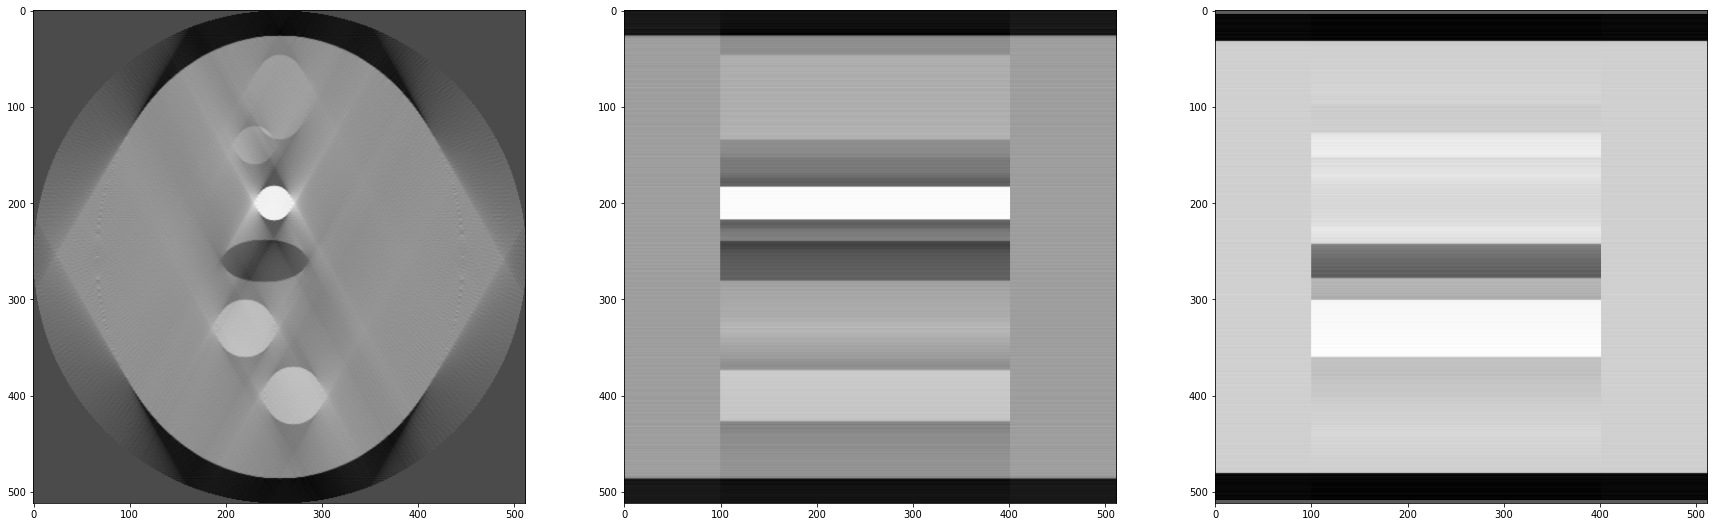

In [0]:
angle = 120.
proj_numb = 120
filter_type = 'ramp'

theta = np.linspace((90.-angle/2), (90.+angle/2), proj_numb, endpoint=False)
sinogram = radon(image_kraft, theta=theta, circle=True)
sinogram_uniform = radon(image_uniform_kraft, theta=theta, circle=True)

reconstruction_fbp = iradon(sinogram, theta=theta, circle=True, filter = filter_type)
reconstruction_fbp_uniform = iradon(sinogram_uniform, theta=theta, circle=True, filter = filter_type)

layer_ind = 256
layer_1_fbp = np.zeros_like(reconstruction_fbp)
for j in range(reconstruction_fbp.shape[1]):
  if (j<100) or (j>400):
    layer_1_fbp[:,j] += reconstruction_fbp_uniform[:,layer_ind]
  else:
    layer_1_fbp[:,j] += reconstruction_fbp[:,layer_ind]

layer_ind = 214
layer_2_fbp = np.zeros_like(reconstruction_fbp)
for j in range(reconstruction_fbp.shape[1]):
  if (j<100) or (j>400):
    layer_2_fbp[:,j] += reconstruction_fbp_uniform[:,layer_ind]
  else:
    layer_2_fbp[:,j] += reconstruction_fbp[:,layer_ind]

fig, (ax1, ax2, ax3) = plt.subplots(1, 3, figsize=(30, 10))
ax1.imshow(reconstruction_fbp, cmap=plt.cm.Greys_r)
ax2.imshow(layer_1_fbp, cmap=plt.cm.Greys_r)
ax3.imshow(layer_2_fbp, cmap=plt.cm.Greys_r)

#io.imsave('phantom_ang'+str(angle)+'_proj'+str(proj_numb)+'_filter_'+filter_type+'_rec_1.jpg', reconstruction_fbp)
#io.imsave('phantom_ang'+str(angle)+'_proj'+str(proj_numb)+'_filter_'+filter_type+'_rec_2.jpg', layer_1_fbp)
#io.imsave('phantom_ang'+str(angle)+'_proj'+str(proj_numb)+'_filter_'+filter_type+'_rec_3.jpg', layer_2_fbp)

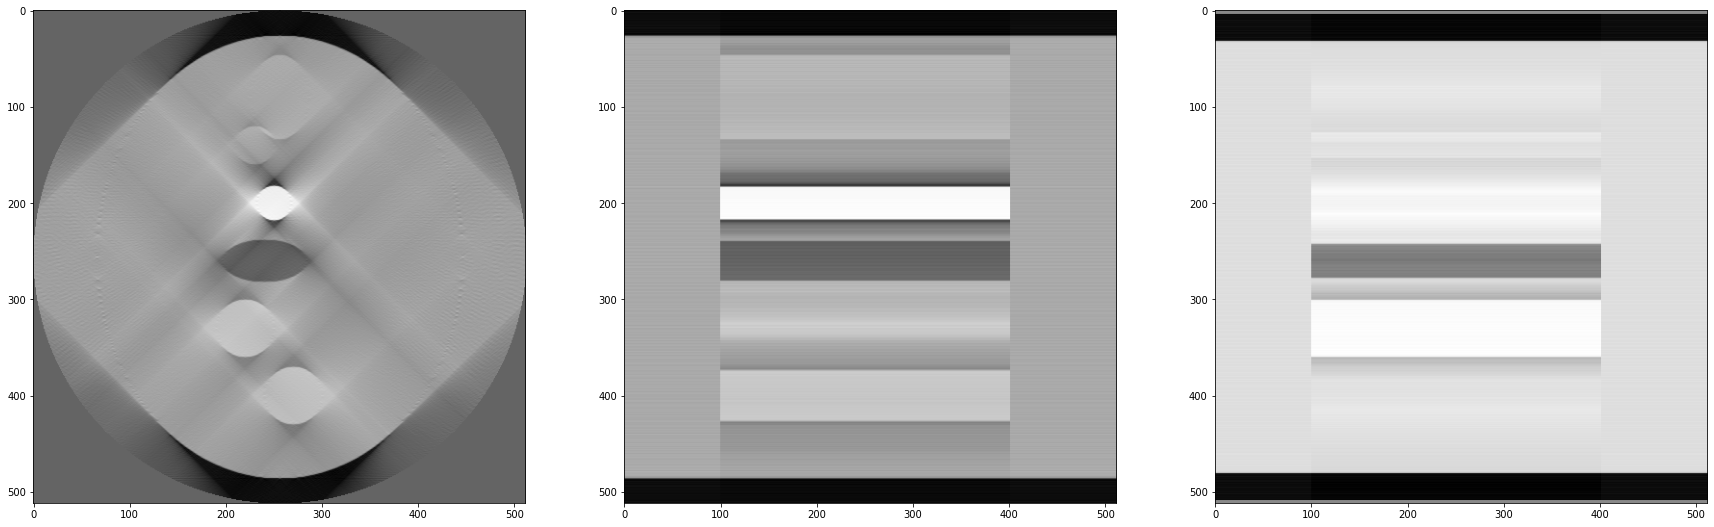

In [0]:
angle = 90.
proj_numb = 90
filter_type = 'ramp'

theta = np.linspace((90.-angle/2), (90.+angle/2), proj_numb, endpoint=False)
sinogram = radon(image_kraft, theta=theta, circle=True)
sinogram_uniform = radon(image_uniform_kraft, theta=theta, circle=True)

reconstruction_fbp = iradon(sinogram, theta=theta, circle=True, filter = filter_type)
reconstruction_fbp_uniform = iradon(sinogram_uniform, theta=theta, circle=True, filter = filter_type)

layer_ind = 256
layer_1_fbp = np.zeros_like(reconstruction_fbp)
for j in range(reconstruction_fbp.shape[1]):
  if (j<100) or (j>400):
    layer_1_fbp[:,j] += reconstruction_fbp_uniform[:,layer_ind]
  else:
    layer_1_fbp[:,j] += reconstruction_fbp[:,layer_ind]

layer_ind = 214
layer_2_fbp = np.zeros_like(reconstruction_fbp)
for j in range(reconstruction_fbp.shape[1]):
  if (j<100) or (j>400):
    layer_2_fbp[:,j] += reconstruction_fbp_uniform[:,layer_ind]
  else:
    layer_2_fbp[:,j] += reconstruction_fbp[:,layer_ind]

fig, (ax1, ax2, ax3) = plt.subplots(1, 3, figsize=(30, 10))
ax1.imshow(reconstruction_fbp, cmap=plt.cm.Greys_r)
ax2.imshow(layer_1_fbp, cmap=plt.cm.Greys_r)
ax3.imshow(layer_2_fbp, cmap=plt.cm.Greys_r)

#io.imsave('phantom_ang'+str(angle)+'_proj'+str(proj_numb)+'_filter_'+filter_type+'_rec_1.jpg', reconstruction_fbp)
#io.imsave('phantom_ang'+str(angle)+'_proj'+str(proj_numb)+'_filter_'+filter_type+'_rec_2.jpg', layer_1_fbp)
#io.imsave('phantom_ang'+str(angle)+'_proj'+str(proj_numb)+'_filter_'+filter_type+'_rec_3.jpg', layer_2_fbp)

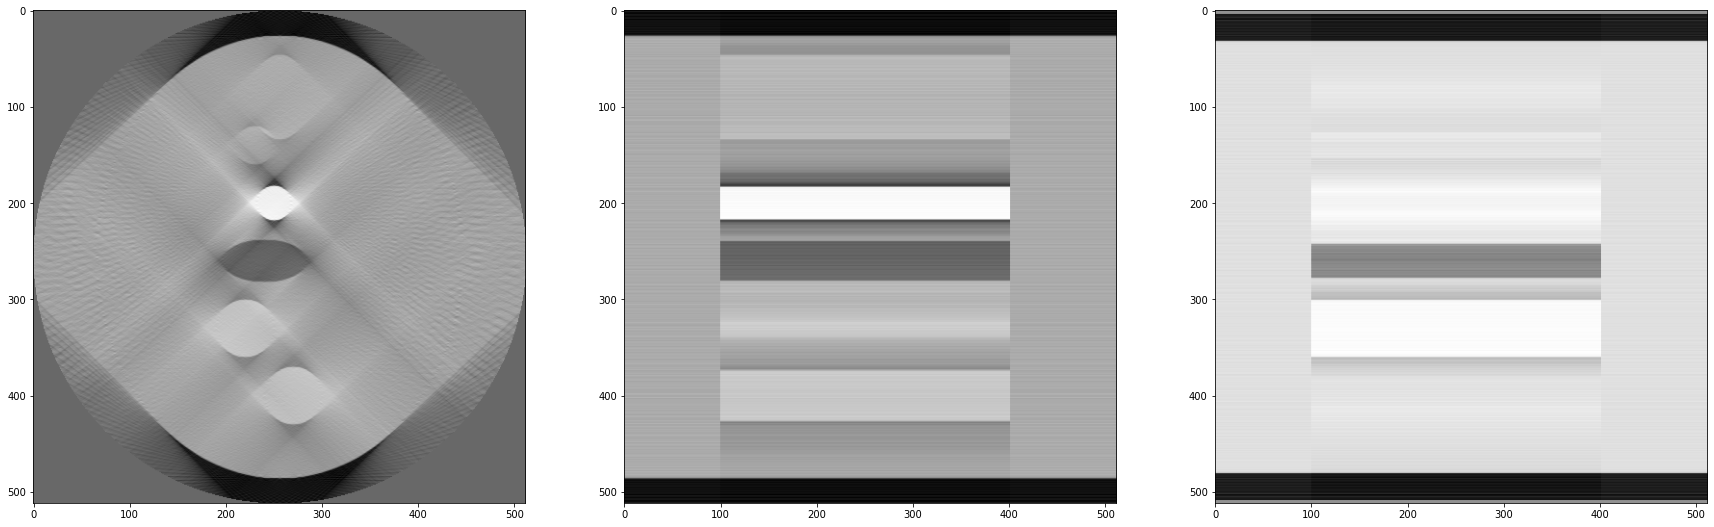

In [0]:
angle = 90.
proj_numb = 45
filter_type = 'ramp'

theta = np.linspace((90.-angle/2), (90.+angle/2), proj_numb, endpoint=False)
sinogram = radon(image_kraft, theta=theta, circle=True)
sinogram_uniform = radon(image_uniform_kraft, theta=theta, circle=True)

reconstruction_fbp = iradon(sinogram, theta=theta, circle=True, filter = filter_type)
reconstruction_fbp_uniform = iradon(sinogram_uniform, theta=theta, circle=True, filter = filter_type)

layer_ind = 256
layer_1_fbp = np.zeros_like(reconstruction_fbp)
for j in range(reconstruction_fbp.shape[1]):
  if (j<100) or (j>400):
    layer_1_fbp[:,j] += reconstruction_fbp_uniform[:,layer_ind]
  else:
    layer_1_fbp[:,j] += reconstruction_fbp[:,layer_ind]

layer_ind = 214
layer_2_fbp = np.zeros_like(reconstruction_fbp)
for j in range(reconstruction_fbp.shape[1]):
  if (j<100) or (j>400):
    layer_2_fbp[:,j] += reconstruction_fbp_uniform[:,layer_ind]
  else:
    layer_2_fbp[:,j] += reconstruction_fbp[:,layer_ind]

fig, (ax1, ax2, ax3) = plt.subplots(1, 3, figsize=(30, 10))
ax1.imshow(reconstruction_fbp, cmap=plt.cm.Greys_r)
ax2.imshow(layer_1_fbp, cmap=plt.cm.Greys_r)
ax3.imshow(layer_2_fbp, cmap=plt.cm.Greys_r)

#io.imsave('phantom_ang'+str(angle)+'_proj'+str(proj_numb)+'_filter_'+filter_type+'_rec_1.jpg', reconstruction_fbp)
#io.imsave('phantom_ang'+str(angle)+'_proj'+str(proj_numb)+'_filter_'+filter_type+'_rec_2.jpg', layer_1_fbp)
#io.imsave('phantom_ang'+str(angle)+'_proj'+str(proj_numb)+'_filter_'+filter_type+'_rec_3.jpg', layer_2_fbp)

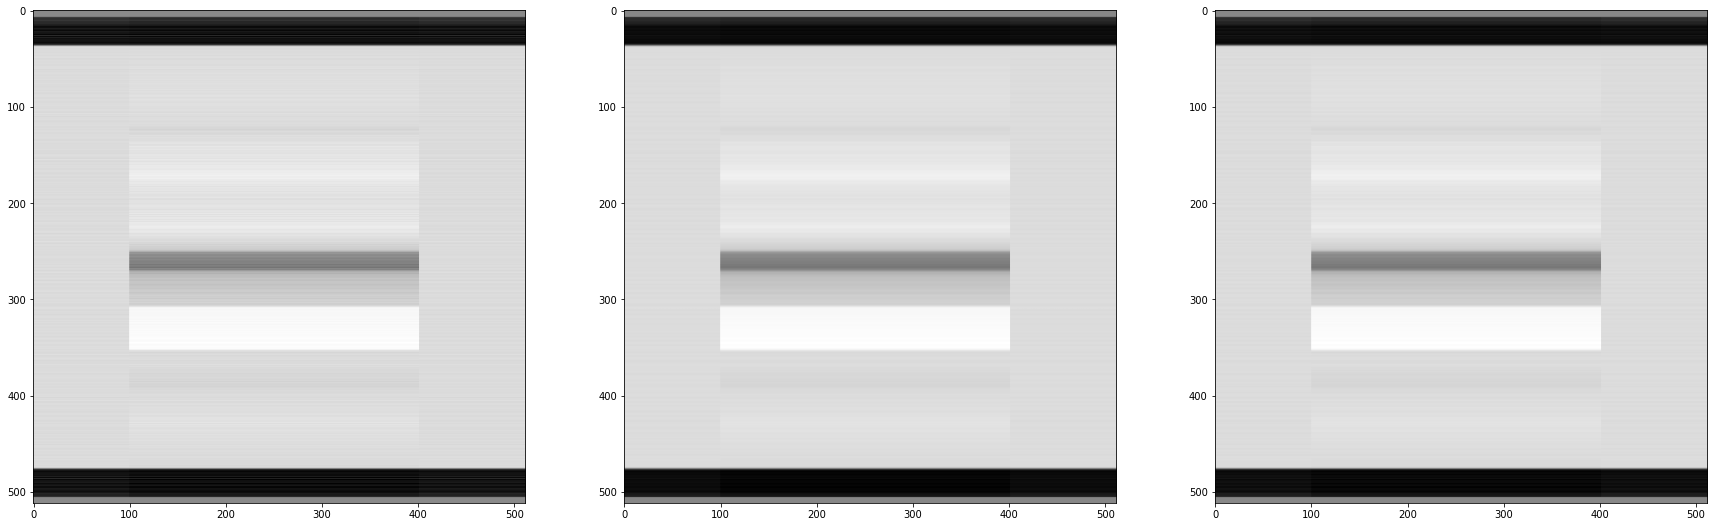

In [0]:
angle = 90.
proj_numb = 45
filter_type_1 = 'ramp'
filter_type_2 = 'hamming'
filter_type_3 = 'cosine'

theta = np.linspace((90.-angle/2), (90.+angle/2), proj_numb, endpoint=False)
sinogram = radon(image_kraft, theta=theta, circle=True)
sinogram_uniform = radon(image_uniform_kraft, theta=theta, circle=True)

reconstruction_fbp_1 = iradon(sinogram, theta=theta, circle=True, filter = filter_type_1)
reconstruction_fbp_1_uniform = iradon(sinogram_uniform, theta=theta, circle=True, filter = filter_type_1)
reconstruction_fbp_2 = iradon(sinogram, theta=theta, circle=True, filter = filter_type_2)
reconstruction_fbp_2_uniform = iradon(sinogram_uniform, theta=theta, circle=True, filter = filter_type_2)
reconstruction_fbp_3 = iradon(sinogram, theta=theta, circle=True, filter = filter_type_3)
reconstruction_fbp_3_uniform = iradon(sinogram_uniform, theta=theta, circle=True, filter = filter_type_3)

layer_ind = 200
layer_1_fbp_1 = np.zeros_like(reconstruction_fbp_1)
layer_1_fbp_2 = np.zeros_like(reconstruction_fbp_2)
layer_1_fbp_3 = np.zeros_like(reconstruction_fbp_3)
for j in range(reconstruction_fbp_1.shape[1]):
  if (j<100) or (j>400):
    layer_1_fbp_1[:,j] += reconstruction_fbp_1_uniform[:,layer_ind]
    layer_1_fbp_2[:,j] += reconstruction_fbp_2_uniform[:,layer_ind]
    layer_1_fbp_3[:,j] += reconstruction_fbp_3_uniform[:,layer_ind]
  else:
    layer_1_fbp_1[:,j] += reconstruction_fbp_1[:,layer_ind]
    layer_1_fbp_2[:,j] += reconstruction_fbp_2[:,layer_ind]
    layer_1_fbp_3[:,j] += reconstruction_fbp_3[:,layer_ind]

fig, (ax1, ax2, ax3) = plt.subplots(1, 3, figsize=(30, 10))
ax1.imshow(layer_1_fbp_1, cmap=plt.cm.Greys_r)
ax2.imshow(layer_1_fbp_2, cmap=plt.cm.Greys_r)
ax3.imshow(layer_1_fbp_3, cmap=plt.cm.Greys_r)

#io.imsave('phantom_ang'+str(angle)+'_proj'+str(proj_numb)+'_filter_'+filter_type_1+'_rec_214.jpg', layer_1_fbp_1)
#io.imsave('phantom_ang'+str(angle)+'_proj'+str(proj_numb)+'_filter_'+filter_type_2+'_rec_214.jpg', layer_1_fbp_2)
#io.imsave('phantom_ang'+str(angle)+'_proj'+str(proj_numb)+'_filter_'+filter_type_3+'_rec_214.jpg', layer_1_fbp_3)

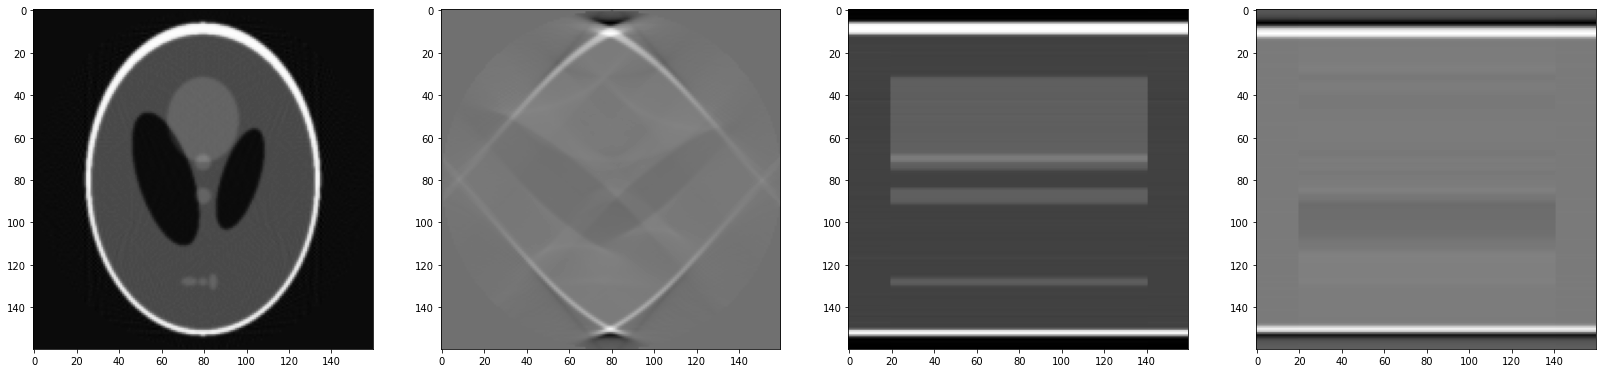

In [0]:
theta = np.linspace(0., 180., max(image.shape), endpoint=False)
sinogram = radon(image, theta=theta, circle=True)
sinogram_uniform = radon(image_uniform, theta=theta, circle=True)

theta_40 = np.linspace(40., 140., max(image.shape), endpoint=False)
sinogram_40 = radon(image, theta=theta, circle=True)
sinogram_uniform_40 = radon(image_uniform, theta=theta, circle=True)

reconstruction_fbp = iradon(sinogram, theta=theta, circle=True)
reconstruction_fbp_uniform = iradon(sinogram_uniform, theta=theta, circle=True)
reconstruction_fbp_40 = iradon(sinogram_40, theta=theta_40, circle=True) # output_size = [80, 80]
reconstruction_fbp_uniform_40 = iradon(sinogram_uniform_40, theta=theta_40, circle=True)

layer_ind = 80
layer_fbp = np.zeros_like(reconstruction_fbp)
for j in range(reconstruction_fbp.shape[1]):
  if (j<20) or (j>140):
    layer_fbp[:,j] += reconstruction_fbp_uniform[:,layer_ind]
  else:
    layer_fbp[:,j] += reconstruction_fbp[:,layer_ind]

layer_fbp_40 = np.zeros_like(reconstruction_fbp_40)
for j in range(reconstruction_fbp_40.shape[1]):
  if (j<20) or (j>140):
    layer_fbp_40[:,j] += reconstruction_fbp_uniform_40[:,layer_ind]
  else:
    layer_fbp_40[:,j] += reconstruction_fbp_40[:,layer_ind]

fig, (ax1, ax2, ax3, ax4) = plt.subplots(1, 4, figsize=(28, 7))
ax1.imshow(reconstruction_fbp, cmap=plt.cm.Greys_r)
ax2.imshow(reconstruction_fbp_40, cmap=plt.cm.Greys_r)
ax3.imshow(layer_fbp, cmap=plt.cm.Greys_r)
ax4.imshow(layer_fbp_40, cmap=plt.cm.Greys_r)

FBP rms reconstruction error: 0.0283


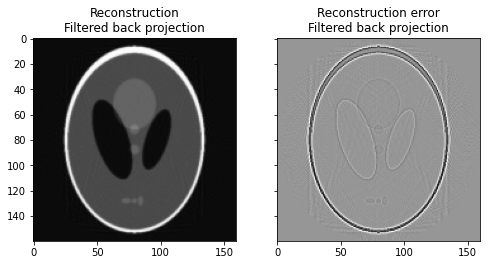

In [0]:
reconstruction_fbp = iradon(sinogram, theta=theta, circle=True)
error = reconstruction_fbp - image
print(f"FBP rms reconstruction error: {np.sqrt(np.mean(error**2)):.3g}")

imkwargs = dict(vmin=-0.2, vmax=0.2)
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(8, 4.5),
                               sharex=True, sharey=True)
ax1.set_title("Reconstruction\nFiltered back projection")
ax1.imshow(reconstruction_fbp, cmap=plt.cm.Greys_r)
ax2.set_title("Reconstruction error\nFiltered back projection")
ax2.imshow(reconstruction_fbp - image, cmap=plt.cm.Greys_r, **imkwargs)
plt.show()

SART (1 iteration) rms reconstruction error: 0.0329
SART (2 iterations) rms reconstruction error: 0.0177


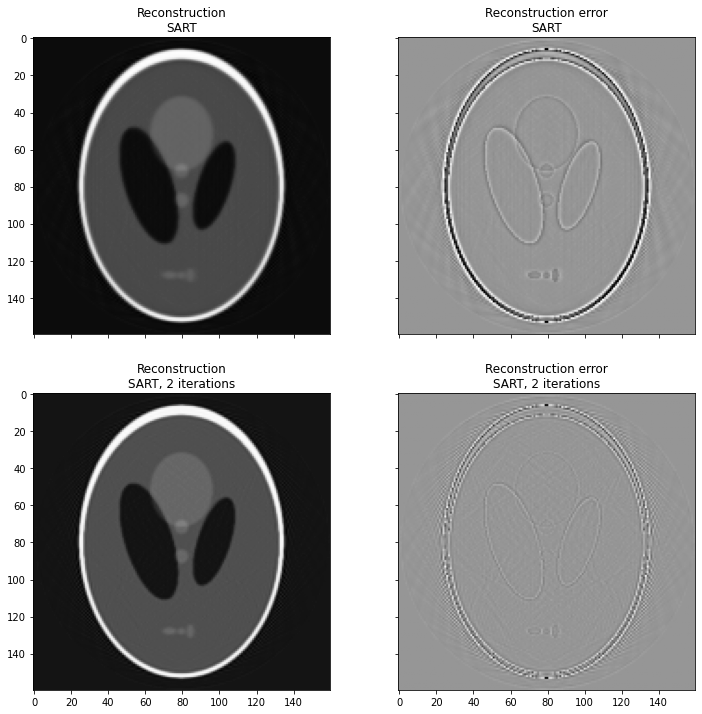

In [0]:
reconstruction_sart = iradon_sart(sinogram, theta=theta)
error = reconstruction_sart - image
print("SART (1 iteration) rms reconstruction error: "
      f"{np.sqrt(np.mean(error**2)):.3g}")

fig, axes = plt.subplots(2, 2, figsize=(12, 12), sharex=True, sharey=True)
ax = axes.ravel()

ax[0].set_title("Reconstruction\nSART")
ax[0].imshow(reconstruction_sart, cmap=plt.cm.Greys_r)

ax[1].set_title("Reconstruction error\nSART")
ax[1].imshow(reconstruction_sart - image, cmap=plt.cm.Greys_r, **imkwargs)

# Run a second iteration of SART by supplying the reconstruction
# from the first iteration as an initial estimate
reconstruction_sart2 = iradon_sart(sinogram, theta=theta,
                                   image=reconstruction_sart)
reconstruction_sart3 = iradon_sart(sinogram, theta=theta,
                                   image=reconstruction_sart2)
error = reconstruction_sart3 - image
print("SART (2 iterations) rms reconstruction error: "
      f"{np.sqrt(np.mean(error**2)):.3g}")

ax[2].set_title("Reconstruction\nSART, 2 iterations")
ax[2].imshow(reconstruction_sart3, cmap=plt.cm.Greys_r)

ax[3].set_title("Reconstruction error\nSART, 2 iterations")
ax[3].imshow(reconstruction_sart3 - image, cmap=plt.cm.Greys_r, **imkwargs)
plt.show()

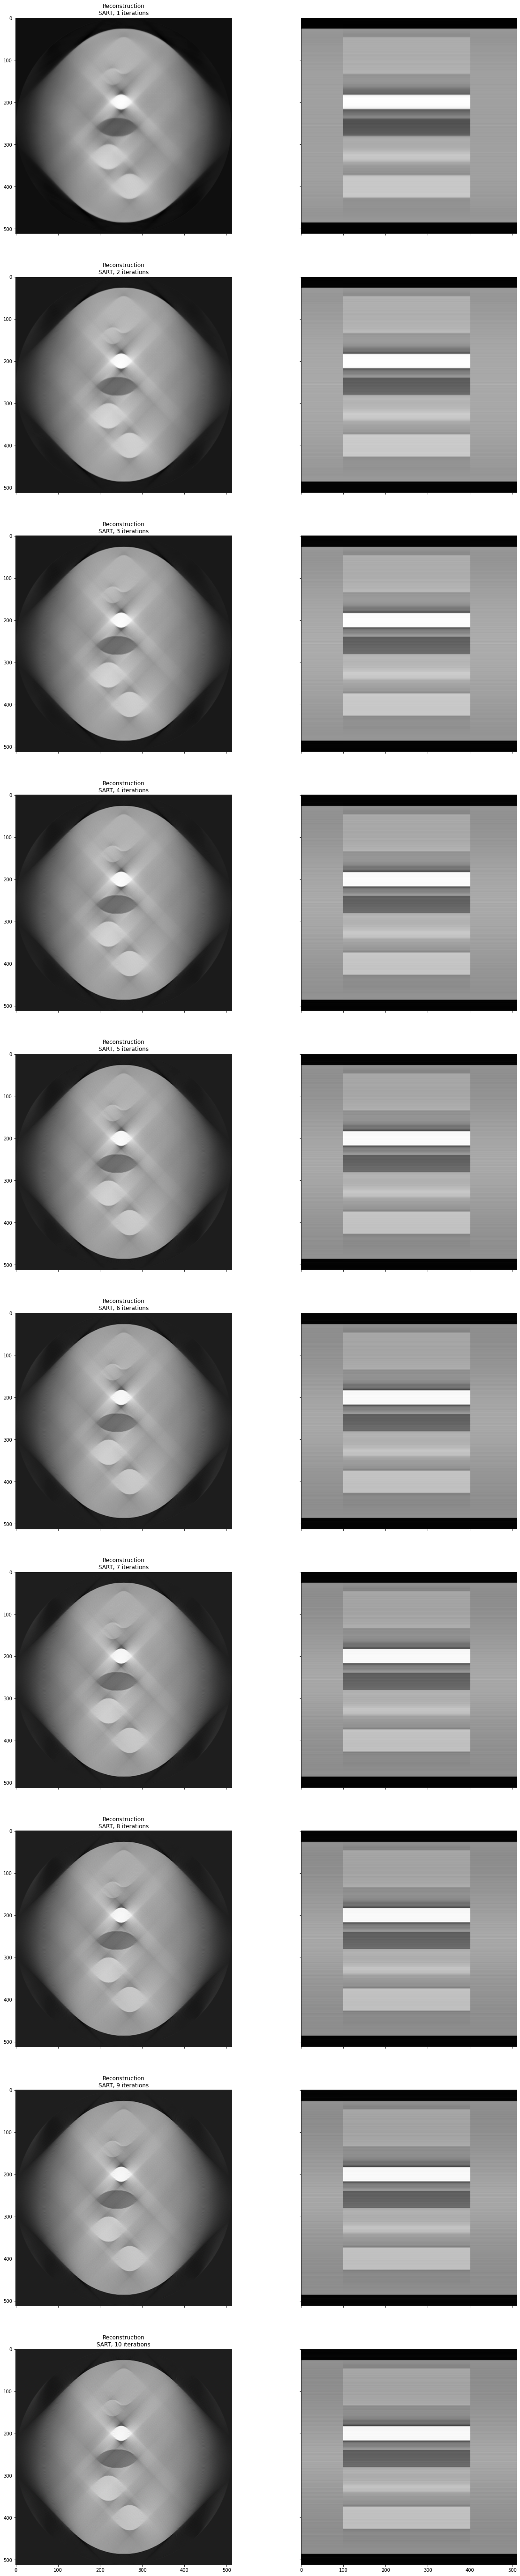

In [0]:
angle = 90.
proj_numb = 90
iter_numb = 10

theta = np.linspace((90.-angle/2), (90.+angle/2), proj_numb, endpoint=False)
sinogram = radon(image_kraft, theta=theta, circle=True)
sinogram_uniform = radon(image_uniform_kraft, theta=theta, circle=True)

reconstruction_sart = iradon_sart(sinogram, theta=theta)
reconstruction_sart_uniform = iradon_sart(sinogram_uniform, theta=theta)

layer_ind = 256
layer_1_sart = np.zeros_like(reconstruction_sart)
for j in range(reconstruction_sart.shape[1]):
  if (j<100) or (j>400):
    layer_1_sart[:,j] += reconstruction_sart_uniform[:,layer_ind]
  else:
    layer_1_sart[:,j] += reconstruction_sart[:,layer_ind]

fig, axes = plt.subplots(10, 2, figsize=(20, 100), sharex=True, sharey=True)
ax = axes.ravel()

ax[0].set_title("Reconstruction\nSART, 1 iterations")
ax[0].imshow(reconstruction_sart, cmap=plt.cm.Greys_r)
ax[1].imshow(layer_1_sart, cmap=plt.cm.Greys_r)

io.imsave('phantom_ang'+str(angle)+'_proj'+str(proj_numb)+'_iter_0'+'_layer_' + str(layer_ind) + '.jpg', layer_1_sart)
io.imsave('phantom_ang'+str(angle)+'_proj'+str(proj_numb)+'_iter_0.jpg', reconstruction_sart)

reconstruction_sart_i = np.copy(reconstruction_sart)
reconstruction_sart_uniform_i = np.copy(reconstruction_sart_uniform)
for i in range(iter_numb-1):
  reconstruction_sart_i = iradon_sart(sinogram, theta=theta,
                                      image=reconstruction_sart_i)
  reconstruction_sart_uniform_i = iradon_sart(sinogram_uniform, theta=theta,
                                              image=reconstruction_sart_uniform_i)
  
  layer_1_sart = np.zeros_like(reconstruction_sart_i)
  for j in range(reconstruction_sart_i.shape[1]):
    if (j<100) or (j>400):
      layer_1_sart[:,j] += reconstruction_sart_uniform_i[:,layer_ind]
    else:
      layer_1_sart[:,j] += reconstruction_sart_i[:,layer_ind]

  ax[2+ i*2].set_title("Reconstruction\nSART, " + str(i+2) + " iterations")
  ax[2+ i*2].imshow(reconstruction_sart_i, cmap=plt.cm.Greys_r)
  ax[3+ i*2].imshow(layer_1_sart, cmap=plt.cm.Greys_r)

  io.imsave('phantom_ang'+str(angle)+'_proj'+str(proj_numb)+'_iter_'+str(i+1)+'_layer_' + str(layer_ind) + '.jpg', layer_1_sart)
  io.imsave('phantom_ang'+str(angle)+'_proj'+str(proj_numb)+'_iter_'+str(i+1)+ '.jpg', reconstruction_sart_i)

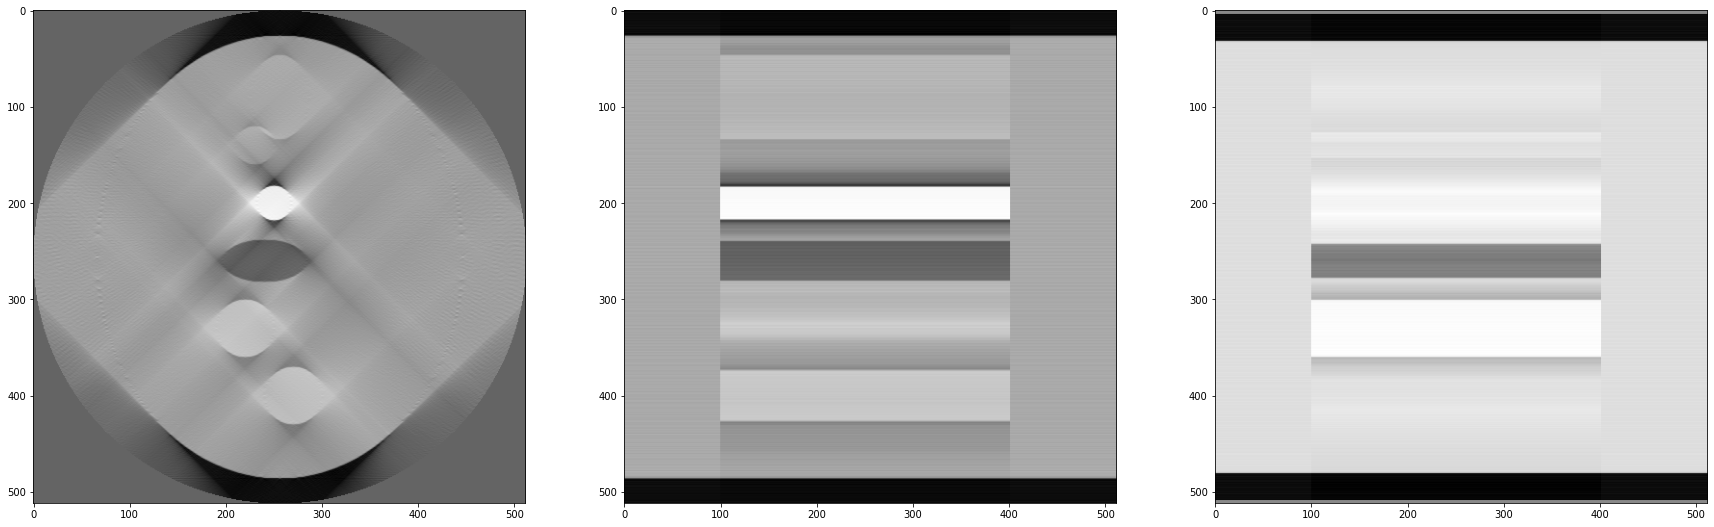

In [0]:
angle = 90.
proj_numb = 90
filter_type = 'ramp'

theta = np.linspace((90.-angle/2), (90.+angle/2), proj_numb, endpoint=False)
sinogram = radon(image_kraft, theta=theta, circle=True)
sinogram_uniform = radon(image_uniform_kraft, theta=theta, circle=True)

reconstruction_fbp = iradon(sinogram, theta=theta, circle=True, filter = filter_type)
reconstruction_fbp_uniform = iradon(sinogram_uniform, theta=theta, circle=True, filter = filter_type)

layer_ind = 256
layer_1_fbp = np.zeros_like(reconstruction_fbp)
for j in range(reconstruction_fbp.shape[1]):
  if (j<100) or (j>400):
    layer_1_fbp[:,j] += reconstruction_fbp_uniform[:,layer_ind]
  else:
    layer_1_fbp[:,j] += reconstruction_fbp[:,layer_ind]

layer_ind = 214
layer_2_fbp = np.zeros_like(reconstruction_fbp)
for j in range(reconstruction_fbp.shape[1]):
  if (j<100) or (j>400):
    layer_2_fbp[:,j] += reconstruction_fbp_uniform[:,layer_ind]
  else:
    layer_2_fbp[:,j] += reconstruction_fbp[:,layer_ind]

fig, (ax1, ax2, ax3) = plt.subplots(1, 3, figsize=(30, 10))
ax1.imshow(reconstruction_fbp, cmap=plt.cm.Greys_r)
ax2.imshow(layer_1_fbp, cmap=plt.cm.Greys_r)
ax3.imshow(layer_2_fbp, cmap=plt.cm.Greys_r)

io.imsave('phantom_ang'+str(angle)+'_proj'+str(proj_numb)+'_filter_'+filter_type+'_rec_1.jpg', reconstruction_fbp)
io.imsave('phantom_ang'+str(angle)+'_proj'+str(proj_numb)+'_filter_'+filter_type+'_rec_2.jpg', layer_1_fbp)